In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ticker_data

In [2]:
START = "2019-01-01"
END = "2020-03-31"

TRAIN_START = "2019-01-01"
TRAIN_END = "2019-12-31"

TEST_START = "2020-01-01"
TEST_END = "2020-03-31"

NUM_FACTORS = 15
GAMMA = 0.1

# DUPLICATES = ['GOOGL', 'GOOG', 'DISCA', 'DISKC', 'FOXA', 'FOX', 'NWSA', 'NWS', 'UAA', 'UA']
DUPLICATES = ['GOOGL', 'DISCK', 'FOXA', 'NWSA', 'UAA']

<AxesSubplot:xlabel='date'>

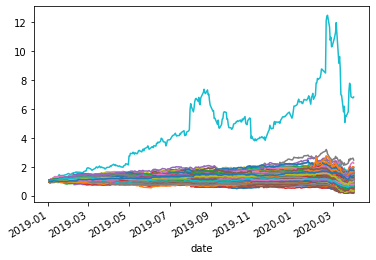

In [3]:
data = ticker_data.get_cross_sectional_data(START, END, "pct_change").drop(columns=DUPLICATES)
(1 + data).cumprod().plot(legend=False)

In [4]:
TICKERS = data.columns.tolist()

In [5]:
def generate_matrix(data):
    T, N = data.shape
    X = data.values
    W = np.diag(1 / (data.std().values))
    Q = X @ W 
    RP_PCA = Q.T @ (np.eye(T) + (GAMMA / T) * (np.ones((T,1)) @ np.ones((1,T)))) @ Q / T
    return RP_PCA

In [6]:
train_data = data.loc[TRAIN_START:TRAIN_END]
test_data = data.loc[TEST_START:TEST_END]

In [7]:
# train_matrix = generate_matrix(train_data)
train_matrix = train_data.corr().values

In [8]:
def compute_eigenvalues(matrix):
    vals, vecs = np.linalg.eigh(matrix)
    return vals[::-1], vecs[:,::-1]    

In [9]:
eigenvalues, eigenvectors = compute_eigenvalues(train_matrix)

Threshold: 3.2687


<ipython-input-10-93b5f63d9f58>:2: RuntimeWarning: invalid value encountered in sqrt
  axs[0].plot(eigenvalues ** 0.5), axs[1].plot(eigenvalues[:NUM_FACTORS] ** 0.5)


(<matplotlib.lines.Line2D at 0x7fc05e3ee5e0>,
 <matplotlib.lines.Line2D at 0x7fc05c319fd0>)

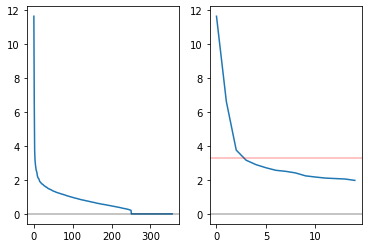

In [10]:
fig, axs = plt.subplots(1, 2) 
axs[0].plot(eigenvalues ** 0.5), axs[1].plot(eigenvalues[:NUM_FACTORS] ** 0.5) 
T, N = data.shape
threshold = (1 + np.sqrt(T/N)) ** 2
print("Threshold: %.4f" % threshold)
axs[1].axhline(threshold, c='red', alpha=0.3)
axs[0].axhline(0, alpha=0.3, c='black'), axs[1].axhline(0, alpha=0.3, c='black')

In [11]:
singvalues = eigenvalues ** 0.5
singvalues = singvalues[singvalues > threshold]
singvalues

<ipython-input-11-8e4ee326a2e9>:1: RuntimeWarning: invalid value encountered in sqrt
  singvalues = eigenvalues ** 0.5


array([11.64969152,  6.61411506,  3.75986347])

In [12]:
def generate_loadings(eigenvectors):
    loadings = -eigenvectors[:,:NUM_FACTORS] / np.sum(np.abs(eigenvectors[:,:NUM_FACTORS]), axis=0)
    return pd.DataFrame(loadings, index=TICKERS, columns=["f%d" % (d+1) for d in range(NUM_FACTORS)])

In [13]:
loadings = generate_loadings(eigenvectors)
loadings

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
MMM,0.002641,0.001960,-0.001417,0.000623,0.003170,-0.001116,0.001763,-0.004628,0.001300,-0.004319,0.001567,0.000273,-0.001548,0.004445,-0.001742
ABT,0.002608,-0.002602,0.003568,0.002026,-0.005005,0.001275,0.005369,0.000053,0.003386,-0.001501,-0.002403,-0.001782,-0.000004,-0.003081,-0.000686
ABBV,0.001682,-0.000885,0.000212,0.002814,-0.001339,-0.000947,0.000679,0.000143,-0.001334,-0.001912,-0.001854,-0.000273,0.003157,-0.002956,-0.000149
ABMD,0.001349,0.000787,0.000985,0.002512,-0.002936,0.001473,0.001513,0.002754,0.005605,-0.003893,-0.001200,-0.003211,-0.002745,-0.003640,0.008517
ACN,0.002924,-0.002708,0.004183,-0.001619,-0.000165,0.001071,-0.002456,-0.000580,0.000081,-0.002443,0.001433,-0.000228,-0.001400,0.002521,-0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.001484,-0.003218,0.001457,-0.003094,-0.000819,-0.002384,-0.000146,-0.003637,-0.000215,0.004579,0.003826,-0.000968,0.001055,0.004908,-0.000854
ZBRA,0.002216,0.000641,0.002876,0.002541,0.002608,0.001791,-0.001607,-0.002529,0.004246,0.001760,-0.003384,0.002641,0.004339,-0.003576,-0.001804
ZBH,0.002109,-0.002116,0.001666,0.001897,-0.003642,0.001054,0.003293,-0.001960,0.002326,0.002814,0.002153,0.001369,-0.002492,-0.003776,-0.000084
ZION,0.002619,0.003170,-0.003670,-0.002320,-0.004192,0.001564,-0.001430,0.003973,0.001872,0.002888,-0.003597,-0.002153,0.001900,-0.000542,-0.001529


In [14]:
def generate_factors(data, loadings):
    return data @ loadings

In [15]:
train_factors = generate_factors(train_data, loadings)
train_factors

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
date,,,,,,,,,,,,,,,
2019-01-02 05:00:00,0.000766,0.014358,0.000061,-0.001173,0.000873,-0.003926,-0.004663,-0.001001,-0.002985,0.004458,0.002606,-0.002889,0.003547,0.000832,-0.001357
2019-01-03 05:00:00,-0.024250,-0.002126,-0.011683,0.000998,-0.002861,0.005159,-0.009546,-0.000664,-0.000167,0.001531,-0.001399,-0.001588,0.001816,-0.003635,-0.002629
2019-01-04 05:00:00,0.036615,0.000806,0.003582,0.004929,0.001144,-0.005226,-0.001103,-0.001993,-0.001233,0.002047,0.000816,-0.000682,0.006200,-0.000123,0.001110
2019-01-07 05:00:00,0.010780,0.002375,0.002400,0.005385,0.005394,0.001752,-0.001658,-0.000161,-0.003904,0.004316,-0.000110,-0.005809,0.002705,-0.006058,0.001616
2019-01-08 05:00:00,0.010461,-0.004554,-0.002240,0.005043,0.002649,0.002153,-0.001348,-0.000607,-0.001655,-0.004366,-0.001087,-0.000985,0.002855,0.002152,0.004510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24 05:00:00,-0.000014,-0.000859,0.000137,-0.000118,0.000491,0.000238,-0.000196,0.000263,-0.000282,0.001685,-0.000511,-0.000252,-0.000249,-0.000308,0.000074
2019-12-26 05:00:00,0.002531,-0.000037,0.000388,-0.000421,0.001489,0.000040,-0.000737,0.001386,-0.001155,-0.000415,0.000432,0.000774,0.001463,0.000686,-0.000282
2019-12-27 05:00:00,-0.001517,-0.003080,-0.000011,-0.000973,-0.000396,0.001062,0.000441,-0.000914,-0.000145,-0.000362,0.000300,-0.000426,-0.000807,-0.000337,-0.000136


In [16]:
spy_data, ndaq_data = ticker_data.get_market_data(START, END) 
market_data = pd.concat([md[['close']].rename(columns={'close': mn}).pct_change().dropna() for md, mn in zip([spy_data, ndaq_data], ["SPY", "NDAQ"])], axis=1)
train_market_data = market_data.loc[TRAIN_START:TRAIN_END]
test_market_data = market_data.loc[TEST_START:TEST_END]

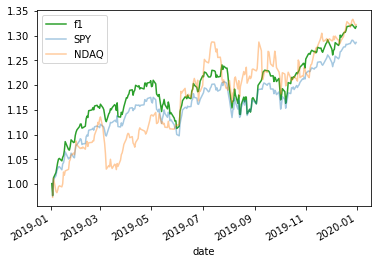

In [17]:
fig, ax = plt.subplots()
(train_factors['f1'] + 1).cumprod().plot(ax=ax, c='C2')
(train_market_data + 1).cumprod().plot(ax=ax, alpha=0.4)
ax.legend()

<AxesSubplot:>

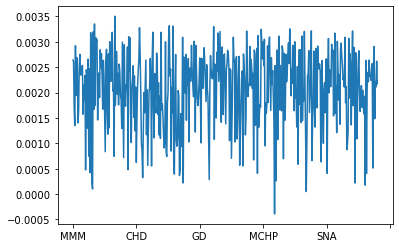

In [18]:
loadings['f1'].plot()

<AxesSubplot:xlabel='date'>

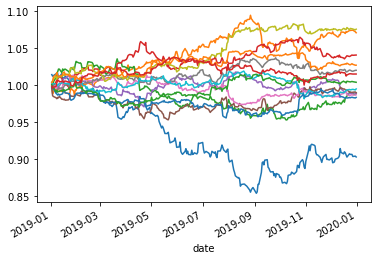

In [19]:
(train_factors.drop(columns=['f1']) + 1).cumprod().plot(legend=False)

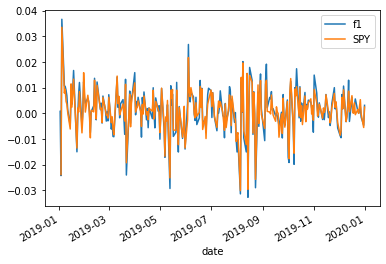

In [20]:
fig, ax = plt.subplots()
train_factors['f1'].plot(ax=ax, label='f1')
train_market_data['SPY'].plot(ax=ax, label='SPY')
ax.legend()

In [21]:
test_factors = generate_factors(test_data, loadings)
test_factors

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15
date,,,,,,,,,,,,,,,
2020-01-02 05:00:00,0.006340,0.005549,0.008745,-0.001578,-0.000176,-0.002338,-0.000820,0.001692,0.000949,0.000201,-0.000358,0.000890,0.001159,0.002095,0.001555
2020-01-03 05:00:00,-0.007766,-0.005571,-0.000826,0.000034,0.001222,0.001881,-0.005508,-0.000848,-0.000062,0.000487,-0.001189,-0.001021,-0.002556,0.001207,0.001750
2020-01-06 05:00:00,0.000294,-0.002003,0.001043,0.004418,-0.001569,0.001022,-0.003003,-0.000719,-0.001897,-0.000356,-0.001384,-0.000352,-0.000450,-0.001133,0.001918
2020-01-07 05:00:00,-0.000280,0.003925,0.003435,0.002989,0.000600,-0.004651,-0.000666,0.000887,0.001699,0.001329,0.001234,-0.002701,-0.001360,0.000124,0.000072
2020-01-08 05:00:00,0.003778,-0.002080,0.002173,-0.001375,-0.000121,0.003204,0.003916,0.000904,-0.001564,0.000294,-0.000549,0.001725,0.001985,0.001075,-0.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25 04:00:00,0.031771,-0.001102,-0.012911,0.001774,0.007230,0.004868,0.000443,0.001032,0.000281,0.002293,-0.005700,0.008544,0.002694,0.011856,0.007272
2020-03-26 04:00:00,0.060086,-0.023947,-0.008605,0.001969,-0.007057,-0.005197,-0.002262,0.001713,-0.002169,0.010758,-0.002574,-0.000279,-0.002526,0.004913,-0.004421
2020-03-27 04:00:00,-0.040326,-0.012949,-0.004739,-0.008013,-0.004724,0.004495,0.003557,0.000614,0.004719,-0.003608,-0.004476,-0.001872,-0.001670,-0.003210,-0.009794


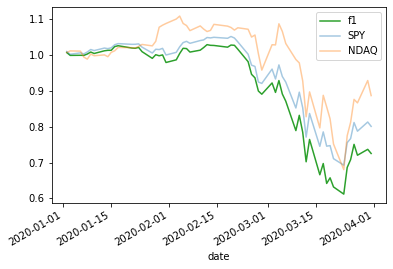

In [22]:
fig, ax = plt.subplots()
(test_factors['f1'] + 1).cumprod().plot(ax=ax, c='C2')
(test_market_data + 1).cumprod().plot(ax=ax, alpha=0.4)
ax.legend()

In [38]:
from sklearn.linear_model import LinearRegression
betas = pd.DataFrame(index=TICKERS, columns=['f%d' % (d+1) for d in range(NUM_FACTORS)], dtype=float)
good_model_tickers = []
results = []
for ticker in TICKERS:
    train_X = train_factors
    train_y = data.loc[TRAIN_START:TRAIN_END][ticker]
    clf = LinearRegression(fit_intercept=False).fit(train_X, train_y)
    train_score = clf.score(train_X, train_y)  
    
    test_X = test_factors
    test_y = data.loc[TEST_START:TEST_END][ticker]
    test_score = clf.score(test_X, test_y)

    
    print("%5s: Train score: %.4f | Test score: %.4f" % (ticker, train_score, test_score))
    betas.loc[ticker] = clf.coef_
    if train_score > 0.75 and test_score > 0.75:
        good_model_tickers.append(ticker)
    results.append({'ticker': ticker, 'train': train_score, 'test': test_score})
results = pd.DataFrame(results).set_index('ticker')

  MMM: Train score: 0.6051 | Test score: 0.5132
  ABT: Train score: 0.7173 | Test score: 0.8497
 ABBV: Train score: 0.2388 | Test score: 0.6593
 ABMD: Train score: 0.4589 | Test score: -0.0311
  ACN: Train score: 0.7146 | Test score: 0.8367
 ATVI: Train score: 0.3652 | Test score: -0.1335
 ADBE: Train score: 0.6857 | Test score: 0.7685
  AMD: Train score: 0.4904 | Test score: 0.6743
  AAP: Train score: 0.3688 | Test score: 0.7021
  AES: Train score: 0.4052 | Test score: 0.4806
  AFL: Train score: 0.5075 | Test score: 0.5776
    A: Train score: 0.5505 | Test score: 0.6319
  APD: Train score: 0.5775 | Test score: 0.7675
 AKAM: Train score: 0.5485 | Test score: -0.2518
  ALK: Train score: 0.4867 | Test score: 0.7579
  ALB: Train score: 0.5085 | Test score: 0.3177
  ARE: Train score: 0.6596 | Test score: 0.8592
 ALXN: Train score: 0.4988 | Test score: 0.1347
 ALGN: Train score: 0.5965 | Test score: 0.7417
 ALLE: Train score: 0.4640 | Test score: 0.8124
  LNT: Train score: 0.8528 | Test sco

<AxesSubplot:xlabel='ticker'>

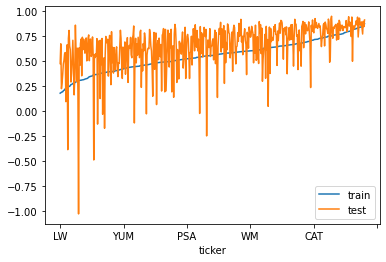

In [41]:
results.sort_values('train').plot()

<AxesSubplot:xlabel='ticker'>

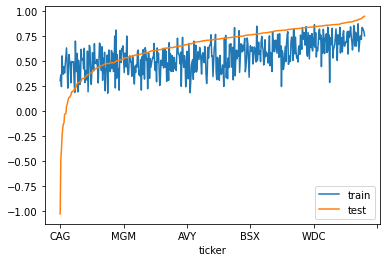

In [42]:
results.sort_values('test').plot()

In [43]:
train_output = train_factors @ betas.T
test_output = test_factors @ betas.T

<AxesSubplot:xlabel='date'>

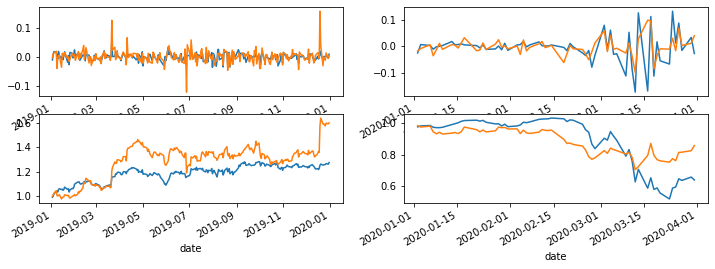

In [44]:
ticker = 'CAG'
fig, axs = plt.subplots(2,2, figsize=(12, 4))

train_output[ticker].plot(ax=axs[0][0]), train_data[ticker].plot(ax=axs[0][0])
test_output[ticker].plot(ax=axs[0][1]), test_data[ticker].plot(ax=axs[0][1])

(1 + train_output[ticker]).cumprod().plot(ax=axs[1][0])
(1 + train_data[ticker]).cumprod().plot(ax=axs[1][0])

(1 + test_output[ticker]).cumprod().plot(ax=axs[1][1])
(1 + test_data[ticker]).cumprod().plot(ax=axs[1][1])
# train_output[ticker].plot(ax=axs[0])
# train_data[ticker].plot(ax=axs[0])

# test_output[ticker].plot(ax=axs[1])
# test_data[ticker].plot(ax=axs[1])

In [27]:
good_betas = betas.loc[good_model_tickers]
good_symbols = good_betas.index.tolist()
print("# of good symbols: %d" % len(good_symbols))

# of good symbols: 45
